In [1]:
import sys
sys.path.append('../../build/python')

In [63]:
import drjit as dr
import mitsuba as mi

In [64]:
mi.set_variant('llvm_ad_rgb')

In [80]:
scene = mi.load_file('../scenes/cbox.xml', max_depth=4)

2022-02-15 09:51:33 INFO main [xml.cpp:1260] Loading XML file "../scenes/cbox.xml" with variant "llvm_ad_rgb"..

2022-02-15 09:51:33 INFO main [Scene] Embree ready. (took 1ms)

2022-02-15 09:51:33 INFO main [xml.cpp:1319] Done loading XML file "../scenes/cbox.xml" (took 13ms).

In [81]:
params = mi.traverse(scene)
dr.enable_grad(params['green.reflectance.value'])
params.update()

In [82]:
image = mi.render(scene, params, spp=128)

2022-02-15 09:51:34 INFO main [SamplingIntegrator] Starting render job (256x256, 128 samples)

2022-02-15 09:51:34 INFO main [SamplingIntegrator] Computation graph recorded. (took 13ms)

In [83]:
dr.forward(params['green.reflectance.value'])
grad_image = dr.grad(image)

2022-02-15 09:51:35 INFO main [SamplingIntegrator] Starting render job (256x256, 128 samples)

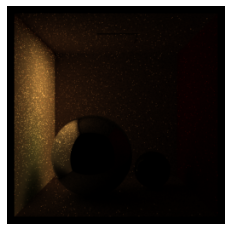

In [84]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(grad_image);